In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

from skimage.io import imread
from imblearn.over_sampling import SMOTE
from pathlib import Path

In [ ]:
data_dir = Path('/content/drive/MyDrive/Fina_Project/archive')

In [ ]:
normal_cases_dir = data_dir / 'Normal'
Cyst_cases_dir = data_dir / 'Cyst'
Stone_cases_dir = data_dir / 'Stone'
Tumor_cases_dir = data_dir / 'Tumor'

In [ ]:
normal_cases = normal_cases_dir.glob('*.jpg')
Cyst_cases = Cyst_cases_dir.glob('*.jpg')
Stone_cases = Stone_cases_dir.glob('*.jpg')
Tumor_cases = Tumor_cases_dir.glob('*.jpg')

In [ ]:
normal_cases1 = normal_cases_dir.glob('*.jpg')
Cyst_cases1 = Cyst_cases_dir.glob('*.jpg')
Stone_cases1 = Stone_cases_dir.glob('*.jpg')
Tumor_cases1 = Tumor_cases_dir.glob('*.jpg')

In [ ]:
train_data = []

for img in Cyst_cases:
    train_data.append((img, 0))

for img in normal_cases:
    train_data.append((img, 1))

for img in Stone_cases:
    train_data.append((img, 2))

for img in Tumor_cases:
    train_data.append((img, 3))

In [ ]:
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)
train_data = train_data.sample(frac=1.).reset_index(drop=True)

In [ ]:
train_data.head()

,image,label
0,/content/drive/MyDrive/Fina_Project/archive/No...,1
1,/content/drive/MyDrive/Fina_Project/archive/No...,1
2,/content/drive/MyDrive/Fina_Project/archive/Cy...,0
3,/content/drive/MyDrive/Fina_Project/archive/Cy...,0
4,/content/drive/MyDrive/Fina_Project/archive/No...,1


In [ ]:
len(train_data)

12501

In [ ]:
cases_count = train_data['label'].value_counts()
print(cases_count)

1    5097
0    3739
3    2288
2    1377
Name: label, dtype: int64


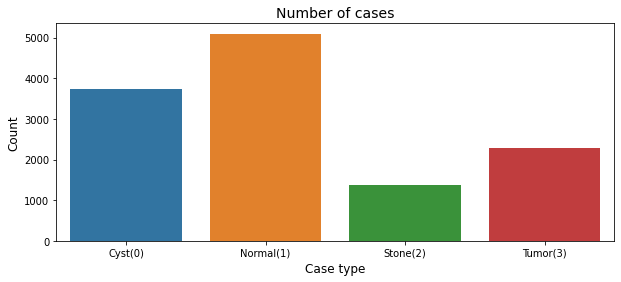

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Cyst(0)','Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

In [ ]:
Cyst_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()
Normal_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
Stone_samples = (train_data[train_data['label']==2]['image'].iloc[:5]).tolist()
Tumor_samples = (train_data[train_data['label']==3]['image'].iloc[:5]).tolist()

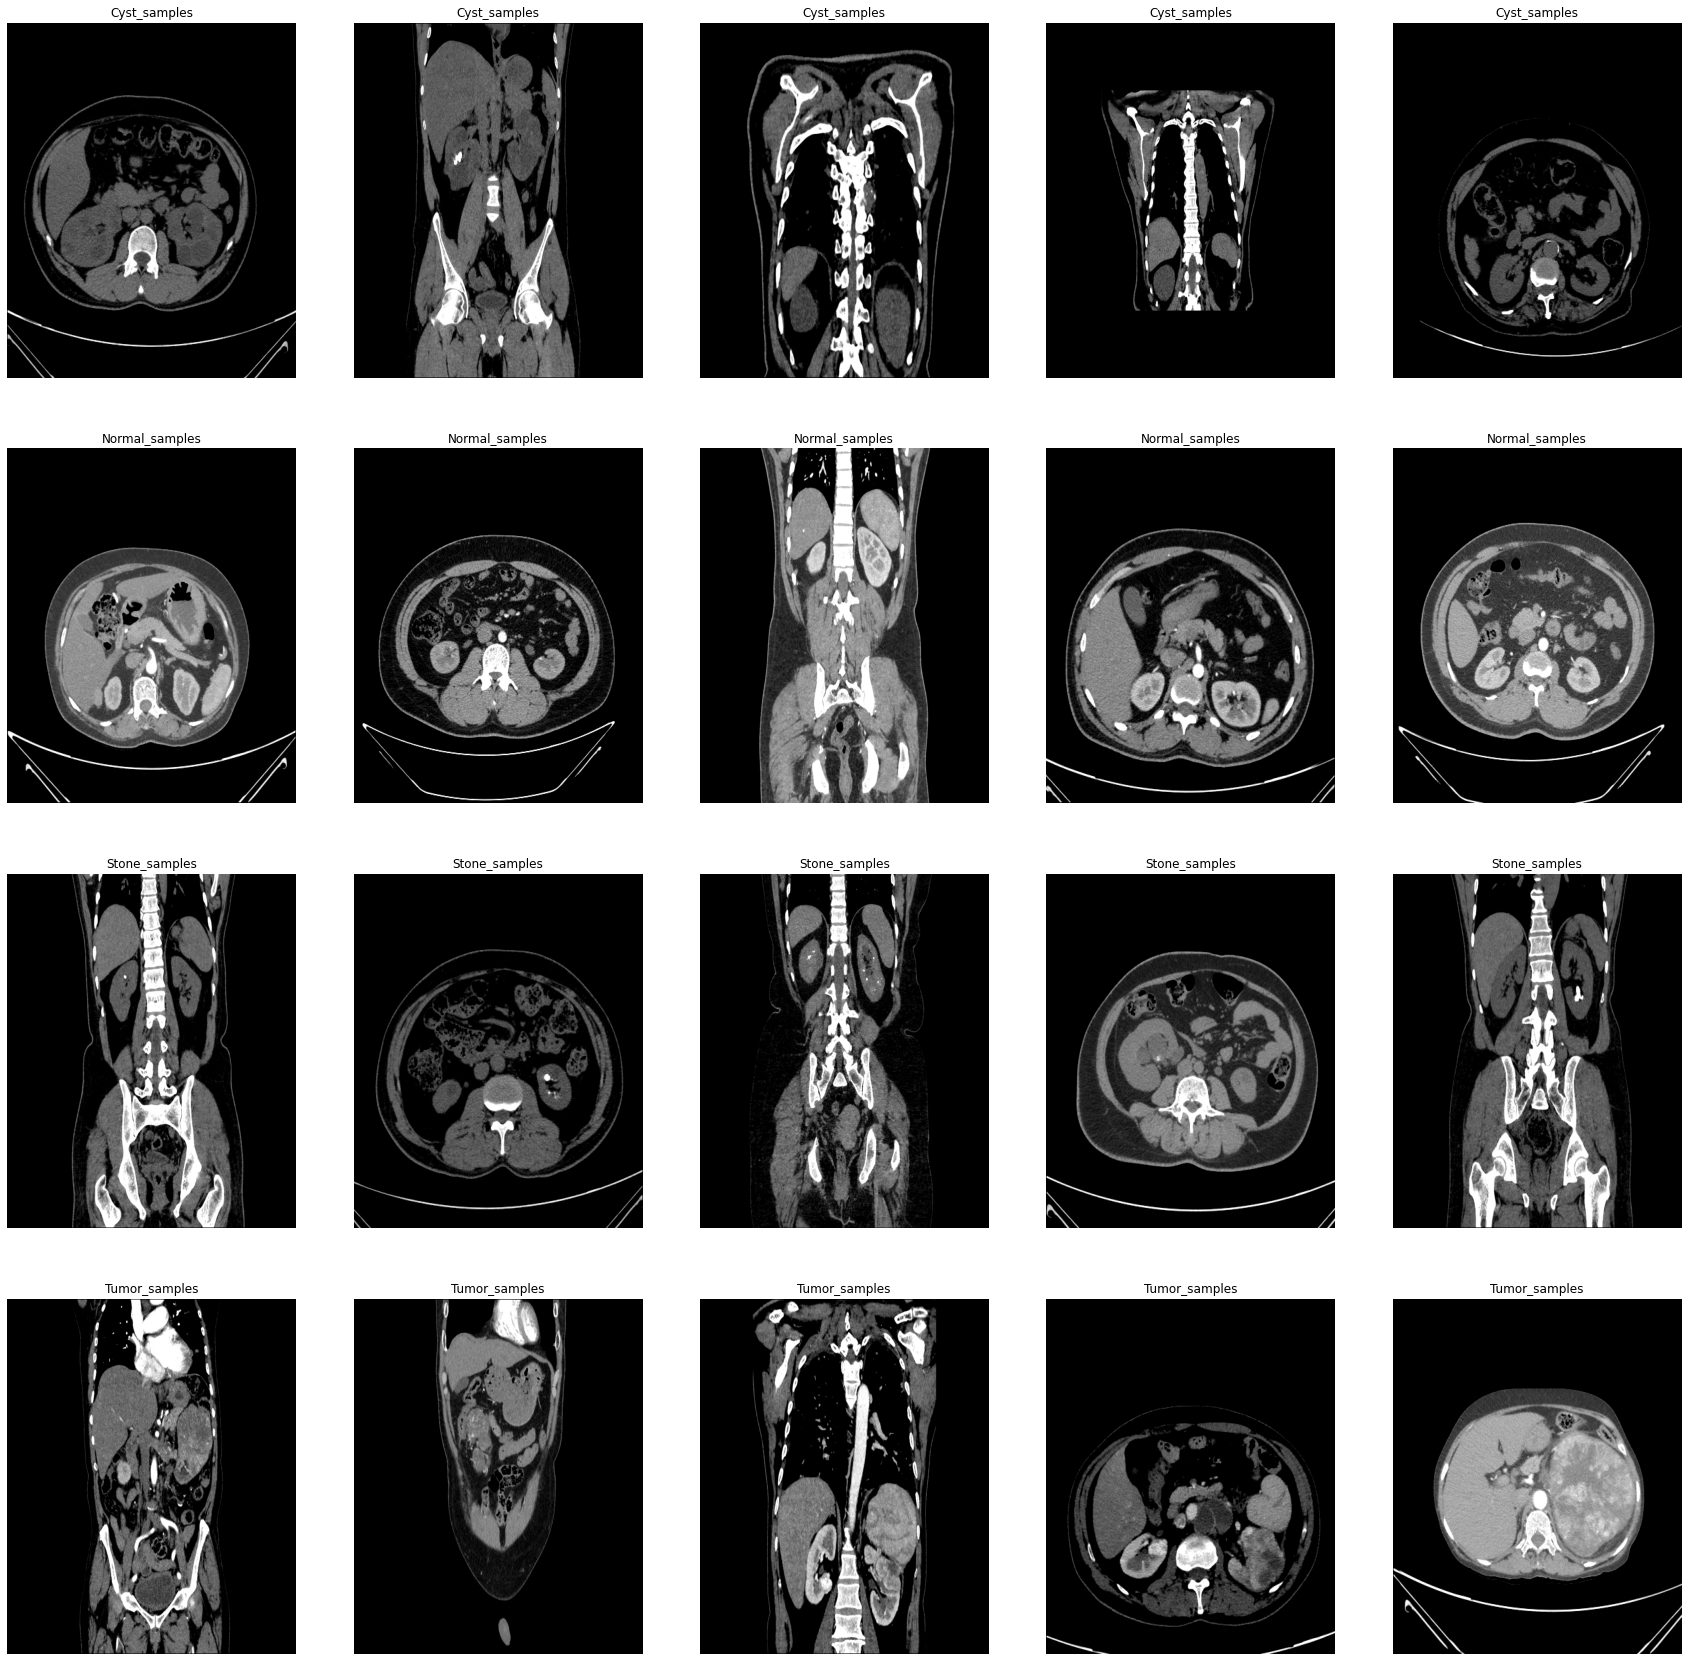

In [ ]:
samples = Cyst_samples + Normal_samples + Stone_samples + Tumor_samples

f, ax = plt.subplots(4, 5, figsize=(30,30))
for i in range(20):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    
    if i<5:
        ax[i//5, i%5].set_title("Cyst_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<15:
        ax[i//5, i%5].set_title("Stone_samples")
    elif i<20:
        ax[i//5, i%5].set_title("Tumor_samples")
    
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
    
plt.show();

In [ ]:
train_data = []
train_labels = []

In [ ]:
for img in Cyst_cases1:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (200, 200))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img / 255
    label = 'Cyst'
    train_data.append(img)
    train_labels.append(label)

for img in normal_cases1:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (200, 200))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label ='Normal'
    train_data.append(img)
    train_labels.append(label)
                      
for img in Stone_cases1:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (200, 200))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Stone'
    train_data.append(img)
    train_labels.append(label)
    
for img in Tumor_cases1:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (200, 200))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Tumor'
    train_data.append(img)
    train_labels.append(label)

In [ ]:
train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

Total number of validation examples:  (12501, 28, 28, 3)
Total number of labels: (12501,)


In [ ]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1['label'] = train_labels1['label'].map({'Cyst':0, 'Normal': 1, 'Stone': 2, 'Tumor': 3})
train_labels1.head()

,label
0,0
1,0
2,0
3,0
4,0


In [ ]:
train_rows = len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)

In [ ]:
smt = SMOTE()
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

In [ ]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

0    5097
1    5097
2    5097
3    5097
Name: label, dtype: int64


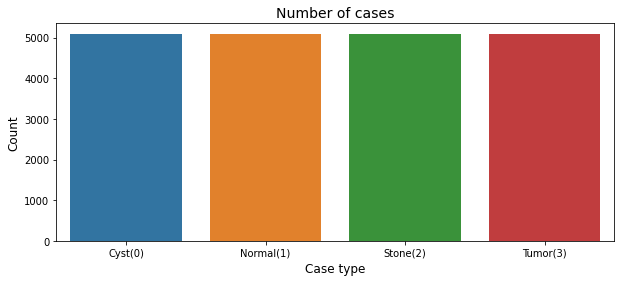

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Cyst(0)','Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

In [ ]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torchvision import transforms, datasets, models
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchsummary import summary
from torchvision.models import resnet18

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, ConfusionMatrixDisplay

In [ ]:
def train_valid_loader(data_dir, batch_size, augment, valid_size, size):
    valid_transform = transforms.Compose([transforms.Resize([size,size]),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
                                 ])
    if augment:
        train_transform = transforms.Compose([transforms.Resize([size,size]),
                                       transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
                                 ])
    else:
        train_transform = transforms.Compose([transforms.Resize([size,size]),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
                                 ])

    train_dataset = datasets.ImageFolder(root=data_dir, transform=train_transform,)

    valid_dataset = datasets.ImageFolder(root=data_dir, transform=valid_transform,)

    num_train = len(train_dataset)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))

    np.random.shuffle(indices)

    train_idx, valid_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler,)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, sampler=valid_sampler,)

    return (train_loader, valid_loader)

In [ ]:
train_loader, test_loader = train_valid_loader("/content/drive/MyDrive/Fina_Project/archive/", batch_size = 32, augment = False, valid_size=0.2, size=200)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fina_Project/archive/kidneyData.csv')

In [ ]:
df["Class"].unique()

array(['Tumor', 'Normal', 'Stone', 'Cyst'], dtype=object)

In [6]:
def train(model, trainloader, loss_fn, optimizer, n):
    correct = 0
    losses = []
    model.train()
    for X, y in trainloader:  
        X = X
        y = y      
        optimizer.zero_grad()
        output = model(X)
        _, predict = torch.max(output, 1)
        correct += torch.sum(predict == y)
        
        loss = loss_fn(output, y)
        losses.append(loss.item())
        
        loss.backward()
        optimizer.step()
    return (correct.item() / n), np.mean(losses)

In [ ]:
def validation(model, testloader, loss_fn, n):
    correct = 0
    losses = []
    model.eval()
    with torch.no_grad():
        for X, y in testloader:
            X = X
            y = y      
            output = model(X)
            _, predict = torch.max(output, 1)
            correct += torch.sum(predict == y)

            loss = loss_fn(output, y)
            losses.append(loss.item())
    
    return (correct.item() / n), np.mean(losses)

In [ ]:
def fit(model, loss_fn, optimizer, EPOCHS):
    losses_train, losses_valid, acc_train, acc_valid, predicts = ([] for i in range(5))
    best_acc = 0

    for e in range(EPOCHS):
        train_c, train_l = train(model, train_loader, loss_fn, optimizer, len(train_loader.sampler))
        print(f"Epoch {e + 1} --- train accuracy {train_c * 100:.3f}    train losses {train_l:.3f}", end='')
        losses_train.append(train_l)  
        acc_train.append(train_c)  

        val_c, val_l = validation(model, test_loader, loss_fn, len(test_loader.sampler))
        print(f" --- valid accuracy {val_c * 100:.3f}   valid losses {val_l:.3f}")
        losses_valid.append(val_l)
        acc_valid.append(val_c)
    return losses_train, losses_valid, acc_train, acc_valid

In [ ]:
globprec, globrec, globf1 = 0, 0, 0

In [ ]:
class FCModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.modelfc = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 8, stride = 3, padding = 4, dilation = 1),
            nn.ReLU(),
            nn.MaxPool2d(4),
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 7, stride = 2, padding = 3, dilation = 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 6, stride = 1, padding = 3, dilation = 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Dropout(0.2),
            nn.Linear(512, 4),
        )
        
    def forward(self, x):
        return self.modelfc(x)

In [ ]:
model = FCModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
losses_train, losses_valid, acc_train, acc_valid = fit(model, loss_fn, optimizer, 10)

KeyboardInterrupt: ignored

In [ ]:
global globprec, globrec, globf1
y_pred = []
y_true = []
with torch.no_grad():
    for X, y in train_loader:
        outputs = model(X)
        _, pred = torch.max(outputs, dim=1)
        y_pred.append(pred)
        y_true.append(y)
y_pred = torch.cat(y_pred).cpu()
y_true = torch.cat(y_true)
creport = classification_report(y_true, y_pred)
print(creport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2984
           1       1.00      1.00      1.00      4087
           2       1.00      1.00      1.00      1098
           3       1.00      1.00      1.00      1832

    accuracy                           1.00     10001
   macro avg       1.00      1.00      1.00     10001
weighted avg       1.00      1.00      1.00     10001



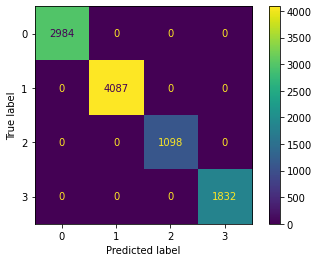

In [ ]:
globprec, globrec, globf1, _ = precision_recall_fscore_support(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
disp.plot();

In [ ]:
global globprec, globrec, globf1
y_pred = []
y_true = []
with torch.no_grad():
    for X, y in test_loader:
        outputs = model(X)
        _, pred = torch.max(outputs, dim=1)
        y_pred.append(pred)
        y_true.append(y)
y_pred = torch.cat(y_pred).cpu()
y_true = torch.cat(y_true)
creport = classification_report(y_true, y_pred)
print(creport)

NameError: ignored

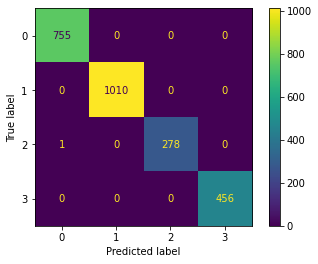

In [ ]:
globprec, globrec, globf1, _ = precision_recall_fscore_support(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
disp.plot();

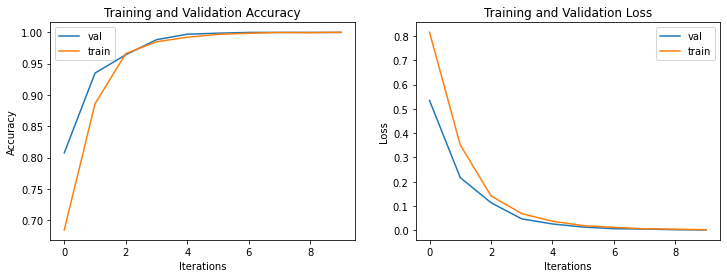

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.set_title("Training and Validation Accuracy")
ax1.plot(acc_valid,label="val")
ax1.plot(acc_train,label="train")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Accuracy")
ax1.legend()

ax2.set_title("Training and Validation Loss")
ax2.plot(losses_valid,label="val")
ax2.plot(losses_train,label="train")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Loss")
ax2.legend();

In [ ]:
# Define the file path where you want to save the model
PATH ="/content/drive/MyDrive/Fina_Project/FC_model.pt"

# Save the model
torch.save(model.state_dict(), PATH)

In [ ]:
model = resnet18(progress=False, pretrained=True)
model.fc = nn.Linear(512, 4)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
losses_train, losses_valid, acc_train, acc_valid = fit(model, loss_fn, optimizer, 5)

Epoch 1 --- train accuracy 99.580    train losses 0.015 --- valid accuracy 99.840   valid losses 0.007


In [ ]:
global globprec, globrec, globf1
y_pred = []
y_true = []
with torch.no_grad():
    for X, y in train_loader:
        outputs = model(X)
        _, pred = torch.max(outputs, dim=1)
        y_pred.append(pred)
        y_true.append(y)
y_pred = torch.cat(y_pred).cpu()
y_true = torch.cat(y_true)
creport = classification_report(y_true, y_pred)
print(creport)

In [ ]:
globprec, globrec, globf1, _ = precision_recall_fscore_support(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
disp.plot()

In [ ]:
global globprec, globrec, globf1
y_pred = []
y_true = []
with torch.no_grad():
    for X, y in test_loader:
        outputs = model(X)
        _, pred = torch.max(outputs, dim=1)
        y_pred.append(pred)
        y_true.append(y)
y_pred = torch.cat(y_pred).cpu()
y_true = torch.cat(y_true)
creport = classification_report(y_true, y_pred)
print(creport)

In [ ]:
globprec, globrec, globf1, _ = precision_recall_fscore_support(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
disp.plot()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.title("Training and Validation Accuracy")
ax1.plot(acc_valid,label="val")
ax1.plot(acc_train,label="train")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Accuracy")
ax1.legend()

ax2.title("Training and Validation Loss")
ax2.plot(losses_valid,label="val")
ax2.plot(losses_train,label="train")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Loss")
ax2.legend()

In [ ]:
PATH = "/content/drive/MyDrive/Fina_Project/ResNet_model.pt"

torch.save(model.state_dict(), PATH)

In [ ]:
model = models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(4096, 4)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
losses_train, losses_valid, acc_train, acc_valid = fit(model, loss_fn, optimizer, 10)

In [ ]:
global globprec, globrec, globf1
y_pred = []
y_true = []
with torch.no_grad():
    for X, y in train_loader:
        outputs = model(X)
        _, pred = torch.max(outputs, dim=1)
        y_pred.append(pred)
        y_true.append(y)
y_pred = torch.cat(y_pred).cpu()
y_true = torch.cat(y_true)
creport = classification_report(y_true, y_pred)
print(creport)

In [ ]:
globprec, globrec, globf1, _ = precision_recall_fscore_support(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
disp.plot()

In [ ]:
global globprec, globrec, globf1
y_pred = []
y_true = []
with torch.no_grad():
    for X, y in test_loader:
        outputs = model(X)
        _, pred = torch.max(outputs, dim=1)
        y_pred.append(pred)
        y_true.append(y)
y_pred = torch.cat(y_pred).cpu()
y_true = torch.cat(y_true)
creport = classification_report(y_true, y_pred)
print(creport)

In [ ]:
globprec, globrec, globf1, _ = precision_recall_fscore_support(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
disp.plot()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.title("Training and Validation Accuracy")
ax1.plot(acc_valid,label="val")
ax1.plot(acc_train,label="train")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Accuracy")
ax1.legend()

ax2.title("Training and Validation Loss")
ax2.plot(losses_valid,label="val")
ax2.plot(losses_train,label="train")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Loss")
ax2.legend()

In [ ]:
PATH = "/content/drive/MyDrive/Fina_Project/VGG_model.pt"

torch.save(model.state_dict(), PATH)